### Python Concurrency

Following resources need to be studied - 

 - Effective Python book chapter (have to look for it)
 - [Python Asyncio: The Complete Guide (SuperFast Python link)](https://superfastpython.com/python-asyncio/)
 - [Async Python in real life](https://guicommits.com/async-python-in-real-life/)
 - [Python Concurrency: The Tricky Bits](https://python.hamel.dev/concurrency/)
 - [	Threads, processes and concurrency in Python: some thoughts](https://news.ycombinator.com/item?id=2012041&utm_source=pocket_saves)
 - [Python Concurrency: An Intro to Threads](https://www.blog.pythonlibrary.org/2014/02/24/python-concurrency-an-intro-to-threads/?utm_source=pocket_reader)
 - [Python Multithreading and Multiprocessing Tutorial](https://www.toptal.com/python/beginners-guide-to-concurrency-and-parallelism-in-python?utm_source=pocket_reader)
 - [Python: A quick introduction to the concurrent.futures module](https://masnun.com/2016/03/29/python-a-quick-introduction-to-the-concurrent-futures-module.html?utm_source=pocket_saves)
 - [Python 3.6, A Tale of Two Futures ](https://idolstarastronomer.com/two-futures.html?utm_source=pocket_reader)
 - [Async IO in Python: A Complete Walkthrough](https://realpython.com/async-io-python/?utm_source=pocket_reader)
 - [Concurrency with Python: CSP and Coroutines](https://bytes.yingw787.com/posts/2019/02/09/concurrency_with_python_csp_and_coroutines/?utm_source=pocket_reader)
 - [How to Choose the Right Python Concurrency API(SuperFast Python link)](https://superfastpython.com/python-concurrency-choose-api/) Also check this relevant [Reddit link](https://www.reddit.com/r/Python/comments/wbdtim/how_to_choose_the_right_python_concurrency_api/?utm_source=pocket_saves)
 - [Async IO in Python: A Complete Walkthrough](http://www.pybloggers.com/2019/01/async-io-in-python-a-complete-walkthrough/?utm_source=pocket_reader)
 
Before you go through any of the above, it is advisable to go through following links as well - 

 - [What is the global interpreter lock (GIL) in CPython?](https://stackoverflow.com/questions/1294382/what-is-the-global-interpreter-lock-gil-in-cpython?utm_source=pocket_reader)
 - [Multiprocessing vs Threading Python](https://stackoverflow.com/questions/3044580/multiprocessing-vs-threading-python?utm_source=pocket_reader)
 
##### Note 
 
Although I didn't go through all the links listed above, after initial exploration I've found that the best resource for learing concurrency and asyncio is the book **Python Concurrency with asyncio** which was repeatedly referenced in SuperFast Python link above. Much of the material in this notebook has been taken from this book. 

#### CAVEAT 

Run all the examples through command prompt. Notebook environment affects the execution of example codes leading to erroneous results/errors.  

#### Process  and Threads

A process is an application with dedicated memory for it which other processes can't access. A process always has at least one thread (*main thread*) associated with it. Threads other than main thread are usually called *worker threads*. Each thread is associated with some process. Threads do not have their own memory. They instead share memory of their parent process.

**Concurrency** - Running multiple processes concurrently by switching from one process to another is called concurrency. In this model, at any given instant, only one process is effectively being run. 

**Parallelism** - While concurrency implies that multiple tasks are in process simultaneously, it does not imply that they are running together in parallel. When we say something is running in parallel, we mean not only are there two or more tasks happening concurrently, but they are also executing at the same time. 

[One must read all the answers in this SO post "What is the difference between concurrency and parallelism?"](https://stackoverflow.com/questions/1050222/what-is-the-difference-between-concurrency-and-parallelism?utm_source=pocket_reader)

Almost every machine these days is a multi-core processor machine. In a quad-core processor, we can run 4 threadS in parallel. However, if you have single-core processor, parallelism isn't possible. Parallelism (in the sense of multithreading) is not possible with single core processors.

**CPU bound tasks vs I/O bound tasks**

Note that there are basically two types of tasks our programs perform - 

 - I/O bound tasks such as exchanging data from servers/databases etc
 - CPU bound tasks such as image processing, mathematical computations etc
 
See this SO link titled [What do the terms CPU bound and I/O means?](https://stackoverflow.com/questions/868568/what-do-the-terms-cpu-bound-and-i-o-bound-mean/33510470#33510470) 

**Python GIL**

Python has GIL (Global Interpreter Lock) which means that at any given instant, only one thread will have control of Interpreter. Python's GIL is intended to serialize access to interpreter internals from different threads. On multi-core systems, it means that multiple threads can't effectively make use of multiple cores. In that sense, Python doesn't offer true parallelism. Using separate processes has no such problems with the GIL, because each process has its own separate GIL.  

In following examples, you'll see that multithreading isn't much useful for CPU-bound tasks. The way GIL works, when a thread is waiting on some I/O operation, it doesn't hold GIL captive. It releases GIL so that other threads can make use of it. The I/O operations happen *outside* of Python so they don't control GIL. The same is not true for CPU bound operations performed by pure Python code. However, if your program delegates the CPU intensive tasks to some library written in C or Fortran (such as Numpy), it will release the GIL just like it would in I/O bound operations. [See this](https://stackoverflow.com/questions/29270818/why-is-a-python-i-o-bound-task-not-blocked-by-the-gil)


In [3]:
#single thread example

%%file async1.py

import os
import threading

print(f'python process running with process id: {os.getpid()}')

total_t = threading.active_count()
thread_n = threading.current_thread().name

print(f'python is currently running {total_t} thread(s)')
print(f'The current thread is {thread_n}')

Overwriting async1.py


In [4]:
!python async1.py

python process running with process id: 7056
python is currently running 1 thread(s)
The current thread is MainThread


Processes can also create other threads that share the memory of the main process.
These threads can do other work concurrently for us via what is known as *multithreading*.

In [6]:
%%file async2.py

import threading

def hello_from_thread():
    print(f'Hello from thread {threading.current_thread()}!')
    
hello_thread = threading.Thread(target=hello_from_thread) #a thread for hello_from_thread
hello_thread.start()

total_threads = threading.active_count()
thread_name = threading.current_thread().name

print(f'Python is currently running {total_threads} thread(s)')
print(f'The current thread is {thread_name}')

hello_thread.join() #join will cause the program to pause until the thread we started completed. 



Overwriting async2.py


In [7]:
!python async2.py

#wrong output. See below

Hello from thread <Thread(Thread-1, started 6492)>!
Python is currently running 1 thread(s)
The current thread is MainThread


I am running script from `async2.py` by emulating shell command within Notebook and I am getting wrong output. I mean output should show that there are 2 threads running. However, if you run the script directly from command shell, you get the correct output. 

Interestingly, I ran the script twice and there were 2 *different* output -

```
Hello from thread <Thread(Thread-1, started 7864)>!
Python is currently running 2 thread(s)
The current thread is MainThread
```
and 

```
Python is currently running 2 thread(s)
Hello from thread <Thread(Thread-1, started 7864)>!
The current thread is MainThread
```

Notice the order of first two lines in each output. This is what is called a *race condition*.


#### Aside -  Multithreading doesn't always produce expected (faster) results

In [1]:
def count(n):
    while n > 0:
        n -= 1        

In [2]:
%timeit 2**100

1.65 µs ± 67.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [6]:
%%timeit 

count(100000000) 
count(100000000)

1min 4s ± 870 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%%timeit

import threading

t1 = threading.Thread(target = count, args = (100000000,))
t2 = threading.Thread(target = count, args = (100000000,))

t1.start()
t2.start()

t1.join(), t2.join()


#we gained nothing from multithreading

1min 3s ± 1.1 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


Multithreaded applications are a common way to achieve concurrency in many programming languages. There are a few challenges in utilizing concurrency with threads in Python, however. Multithreading is only useful for I/O-bound work because we are limited by the global interpreter lock, which is discussed elsewhere.

Multithreading is not the only way we can achieve concurrency; we can also create multiple processes to do work concurrently for us. This is known as multiprocessing. In multiprocessing, a parent process creates one or more child processes that it manages. It can then distribute work to the child processes.

Python gives us the `multiprocessing` module to handle this. The API is similar to that of the threading module. We first create a process with a `target` function. Then, we call its `start` method to execute it and finally its `join` method to wait for it to complete running.

In [4]:
%%file async3.py

import os
import multiprocessing

def hello_from_process():
    print(f'Hello from child process {os.getpid()}!')
    
if __name__ == '__main__':
    hello_process = multiprocessing.Process(target=hello_from_process)
    hello_process.start()
    print(f'Hello from parent process {os.getpid()}')
    hello_process.join()

Overwriting async3.py


Output would be - 

```
Hello from parent process 7468
Hello from child process 5240!
```

Question - I don't get why order of output is the way it is. Shouldn't second line come first? How do we know which is parent process and which is child process?

**Note**  - I have skipped `requests` based examples which show that multithreading is useful for I/O bound operations. 

#### `asyncio` and the GIL

So far we've used the `multithreading` and `multiprocessing` modules and also examined few cases where they were/weren't useful. We also noted that during I/O operations, Python releases the GIL. 

`asyncio` exploits the fact that I/O operations release the GIL to give us concurrency, even with only one thread. When we utilize asyncio we create objects called coroutines. A coroutine can be thought of as executing a lightweight thread. Much like we can have multiple threads running at the same time, each with their own concurrent I/O operation, we can have many coroutines running alongside one another. **Coroutines are functions that can be stopped and resumed while being run.**

For better understanding of coroutines in the context of `asyncio`, see [How does asyncio actually work?](https://stackoverflow.com/questions/49005651/how-does-asyncio-actually-work/51116910#51116910). This is an amazing SO post.

**Sockets**

I/O operations are all about sending/receiving data to/from a network. A *socket* is a low-level (OS level) abstraction for sending and receiving data over a network. As such, sockets are blocking by default. That is, when we are waiting for a
server to reply with data, we halt our application or block it until we get data to read. Thus, our application stops running any other tasks until we get data from the server, an error happens, or there is a timeout. At the operating system level, we don’t need to do this blocking. Sockets can operate in non-blocking mode. In non-blocking mode, when we write bytes to a socket, we can just fire and forget the write or read, and our application can go on to perform other tasks. Later, we can have the operating system tell us that we received bytes and deal with it at that time. This lets the application do any number of things while we wait for bytes to
come back to us. Instead of blocking and waiting for data to come to us, we become more reactive, letting the operating system inform us when there is data for us to act on.

In all OSes, there is an underlying `select` function which serve as some sort of notification system. **Select** is a blocking function, implemented by the operating system underneath, that allows waiting on sockets for incoming or outgoing data. Upon receiving data it wakes up, and returns the sockets which received data, or the sockets which are ready for writing. 

This system keep track of our non-blocking sockets and notify us when they are ready for us to do something with them. This notification system is the basis of how asyncio can achieve concurrency. In asyncio’s model of concurrency, we have only one thread executing Python at any given time. When we hit an I/O operation, we hand it over to our operating system’s event notification system to keep track of it for us. Once we have done this handoff, our Python thread is free to keep running other Python code or add more non-blocking sockets for the OS to keep track of for us.

But how do we keep track of which tasks are waiting for I/O as opposed to ones that
can just run because they are regular Python code? The answer lies in a construct
called an **event loop**.



[Python docs: Coroutines and Tasks](https://docs.python.org/3/library/asyncio-task.html)

#### `asyncio` - Introduction

Some examples.

In [8]:
%%file async4.py

import asyncio

async def inner():
    await asyncio.sleep(5)
    print("running inner")
    return 1

async def outer():
    print("running outer")
    await inner()
    print("Done")
    
asyncio.run(outer())    

Overwriting async4.py


In [19]:
%%file async5.py

import asyncio
import time

async def say_after(delay, what):
    await asyncio.sleep(delay)
    print(what)

async def main():
    print(f"started at {time.strftime('%X')}")

    await say_after(3, 'hello')
    await say_after(4, 'world')

    print(f"finished at {time.strftime('%X')}")

asyncio.run(main())

#This is merely an example of asyncio, coroutine function and async, await keywords. 
#This is NOT an example of concurrency. The 2 runs of say_after are not concurrent. 

Overwriting async5.py


Output
```
started at 11:13:00
hello
world
finished at 11:13:07
```

Notice the gap of 7 seconds. The lines `await say_after(3, 'world')` and `await say_after(4, 'world')` weren't executed concurrently. They were executed sequentially. 

In [20]:
%%file async6.py

import asyncio
import time

async def say_after(delay, what):
    await asyncio.sleep(delay)
    print(what)

async def main():
    task1 = asyncio.create_task(
        say_after(3, 'hello'))

    task2 = asyncio.create_task(
        say_after(4, 'world'))

    print(f"started at {time.strftime('%X')}")

    # Wait until both tasks are completed (should take
    # around 2 seconds.)
    await task1
    await task2

    print(f"finished at {time.strftime('%X')}")
    
asyncio.run(main())    

Overwriting async6.py


Output

```
started at 11:14:20
hello
world
finished at 11:14:24
```

Now notice the time-gap of 4 second. Unlike `async5.py`, above we created 2 tasks using `async.create_task()`. Now these tasks are run concurrently. This way, we were able to save 3 seconds.  

**Future**

A Future represents an eventual result of an asynchronous operation. Not thread-safe.

Future is an awaitable object. Coroutines can await on Future objects until they either have a result or an exception set, or until they are cancelled. A Future can be awaited multiple times and the result is same. A `future` is a Python object that contains a single value that you expect to get at some
point in the future but may not yet have. Usually, when you create a future, it does
not have any value it wraps around because it doesn’t yet exist. In this state, it is con-
sidered incomplete, unresolved, or simply not done. Then, once you get a result, you
can set the value of the future. This will complete the future; at that time, we can
consider it finished and extract the result from the future. 

**Tasks**

Tasks are wrappers around a coroutine that schedule a coroutine to run on the event loop as soon as possible. Tasks are used to run coroutines concurrently in event loops. If a coroutine awaits on a Future, the Task suspends the execution of the coroutine and waits for the completion of the Future. When the Future is done, the execution of the wrapped coroutine resumes. 

**Awaitables**

Anything which can be `await`ed. Coroutines, tasks and futures are awaitables. 

**The relationship between futures, tasks and coroutines**

There is a strong relationship between tasks and futures. In fact, `task` directly inherits from `future`. A `future` can be thought as representing a value that we won’t have for a while. A `task` can be thought as a combination of both a coroutine and a `future`. When we create a `task`, we are creating an empty `future` and running the coroutine. Then, when the coroutine has completed with either an exception or a result, we set
the result or exception of the `future`.

Given the relationship between futures and tasks, is there a similar relationship between tasks and coroutines? After all, all these types can be used in `await` expressions. The common thread between these is the `Awaitable` abstract base class. This class defines one abstract dunder method `__await__`. We won’t go into the specifics about how to create our own awaitables, but anything that implements the `__await__` method can be used in an `await` expression. Coroutines inherit directly from `Awaitable`, as do `future`s. Tasks then extend futures, which gives us the inheritance diagram shown in figure below - 

               ---------------
               |  Awaitable  |
               ---------------
                     |
                     |
           ---------------------       
           |                   |
     --------------     ----------------
     |Coroutines  |     |   Futures    |
     --------------     ---------------
                               |
                        ----------------
                        |    Tasks     |
                        ----------------

Event loops use cooperative scheduling: an event loop runs one Task at a time. While a Task awaits for the completion of a Future, the event loop runs other Tasks, callbacks, or performs IO operations.

In example `async6`, we saw concurrency using `asyncio` in action. Although we achieved concurrency in that example, our main code block wasn't doing anything except for waiting. Let us make our code do some more work while it waits. 

In [26]:
%%file async7.py

import asyncio
import time

async def say_after(delay, what):
    await asyncio.sleep(delay)
    print(what)

async def power2():
    print('doing power2')
    return 2**100000000

async def main():
    task1 = asyncio.create_task(say_after(3, 'hello'))
    task2 = asyncio.create_task(say_after(4, 'world'))
    task3 = asyncio.create_task(power2())

    print(f"started at {time.strftime('%X')}")

    # Wait until both tasks are completed (should take
    # around 2 seconds.)
    await task3
    await task1
    await task2

    print(f"finished at {time.strftime('%X')}")
    
asyncio.run(main())    

Overwriting async7.py


Output - 

```
started at 11:51:33
doing power2
hello
world
finished at 11:51:37
```

Compare examples of `async6` and `async7`. Both are almost identical except for we added a function returning value of 2\*\*100000000 in later example. We saw that `async6` took 3 seconds to complete but all it did was awaiting on results. So we made it do some other work while it waited. You can see that it still took only 3 seconds but while waiting for task1 and task2 to be completed, it calculated 2\*\*100000000 for us. 


#### Cancelling Tasks

Canceling a task is straightforward. Each task object has a method named `cancel`, which we can call whenever we’d like to stop a task. Canceling a task will cause that task to raise a `CancelledError` when we await it, which we can then handle as needed.



In [36]:
#It took me some time to understand that following code is wrongly implemented. See example async8 for correct way

import asyncio
from asyncio import CancelledError

async def longwait(n):
    print('doing long wait')
    await asyncio.sleep(n)

async def main():
    long_task = asyncio.create_task(longwait(10))

    seconds_elapsed = 0
    await long_task
    
    try:    
        while not long_task.done():
            print('Task not finished, checking again in a second.')
            await asyncio.sleep(1)
            seconds_elapsed = seconds_elapsed + 1
            if seconds_elapsed == 3:
                long_task.cancel()
    except CancelledError:
        print('Our task was cancelled')
    
asyncio.run(main())    

Overwriting async8.py


In [38]:
%%file async8.py

import asyncio
from asyncio import CancelledError

async def longwait(n):
    print('doing long wait')
    await asyncio.sleep(n)

async def main():
    long_task = asyncio.create_task(longwait(10))

    seconds_elapsed = 0

    while not long_task.done():                                      #a, 
        print('Task not finished, checking again in a second.')      #b
        await asyncio.sleep(1)                                       #c
        seconds_elapsed = seconds_elapsed + 1
        if seconds_elapsed == 5:
            long_task.cancel()
    try:                                                            #d
        await long_task
    except CancelledError:
        print('Our task was cancelled')

asyncio.run(main())

#Looking at this code, I was wondering wouldn't `while` clause run completely even before `try` clause is executed? 
#Because long_task doesn't even start executing until we reach to try clause.
#Then I realize my mistake. The thing is 1st a# is executed, then #b and then #c. While waiting on #c, code jumps to #d and
#while #d is running, code again jumps to #c to check its status. 

Overwriting async8.py


Something important to note about cancellation is that a `CancelledError` can only be thrown from an await statement. This means that if we call cancel on a task when it is executing plain Python code, that code will run until completion until we
hit the next `await` statement (if one exists) and a `CancelledError` can be raised. Call-
ing cancel won’t magically stop the task in its tracks; it will only stop the task if you’re
currently at an await point or its next await point.

#### Setting a timeout and canceling with `wait_for`

Checking every second or at some other time interval, and then canceling a task, as we did in the previous example, isn’t the easiest way to handle a timeout.

asyncio provides this functionality through a function called `asyncio.wait_for`. This function takes in a coroutine or task object, and a timeout specified in seconds. It then returns a coroutine that we can await. If the task takes more time to complete than the timeout we gave it, a `TimeoutException` will be raised. Once we have reached the timeout threshold, the task will automatically be canceled. 

In [42]:
%%file async9.py

import asyncio

async def longwait(n):
    print('doing long wait')
    await asyncio.sleep(n)

async def main():
    long_task = asyncio.create_task(longwait(10))
    
    try:
        result = await asyncio.wait_for(long_task, timeout=1)
        print(result)
    except asyncio.exceptions.TimeoutError:
        print('Got a timeout!')
        print(f'Was the task cancelled? {long_task.cancelled()}')

asyncio.run(main())    
    

Overwriting async9.py


Canceling tasks automatically if they take longer than expected is normally a good idea. Otherwise, we may have a coroutine waiting indefinitely, taking up resources that may never be released. However, in certain circumstances we may want to keep
our coroutine running. For example, we may want to inform a user that something is taking longer than expected after a certain amount of time but not cancel the task when the timeout is exceeded.

To do this we can wrap our task with the `asyncio.shield` function. This function will prevent cancellation of the coroutine we pass in, giving it a “shield,” which cancellation requests then ignore.

In [51]:
%%file async10.py

import asyncio

async def longwait(n):
    print('doing long wait')
    await asyncio.sleep(n)

async def main():
    long_task = asyncio.create_task(longwait(10))
    
    try:
        result = await asyncio.wait_for(asyncio.shield(long_task), timeout=1)
        print(result)
    except asyncio.exceptions.TimeoutError:
        print('Taking longer than usual. Please wait.')
        result  = await long_task   
        print(result)               

asyncio.run(main())    

#why not use the `result` from try block?
#maybe coz we tried to print result before it was assigned any value in try block?

Overwriting async10.py


#### Futures

We have already talked a bit about futures. 

To understand the basics of futures, let’s try creating one, setting its value and extracting that value back out.

In [52]:
%%file async11.py

from asyncio import Future
my_future = Future()

print(f'Is my_future done? {my_future.done()}')

my_future.set_result(42)

print(f'Is my_future done? {my_future.done()}')
print(f'What is the result of my_future? {my_future.result()}')

Writing async11.py


Output - 

```
Is my_future done? False
Is my_future done? True
What is the result of my_future? 42
```

Futures can also be used in `await` expressions. If we `await` a `future`, we’re saying
“pause until the `future` has a value set that I can work with, and once I have a value,
wake up and let me process it."

In [55]:
results = [1,2,3,0,2,3,0, False, True, []]
[result for result in results if result]

# funny example

[1, 2, 3, 2, 3, True]

#### Measuring coroutine execution time with decorators

Go through the following code carefully - 

In [57]:
%%file async_timed.py

import functools
import time

def async_timed():
    def wrapper(func):
        @functools.wraps(func)
        async def wrapped(*args, **kwargs):
            print(f'starting {func} with args {args} {kwargs}')
            start = time.time()
            try:
                return await func(*args, **kwargs)
            finally:
                end = time.time()
                total = end - start
                print(f'finished {func} in {total:.4f} second(s)')
        return wrapped
    return wrapper



Overwriting async_timed.py


In this decorator, we create a new coroutine called *wrapped*. This is a wrapper around our original coroutine that takes its arguments, \*args and \*\*kwargs, calls an `await` statement, and then returns the result. We surround that `await` statement with one message when we start running the function and another message when we end running the function, keeping track of the start and end time in much the same way that we did in our earlier start-time and end-time example. 

In [62]:
%%file async12.py

import asyncio
from async_timed import async_timed

@async_timed()
async def delay(delay_seconds: int) -> int:
    print(f'sleeping for {delay_seconds} second(s)')
    await asyncio.sleep(delay_seconds)
    print(f'finished sleeping for {delay_seconds} second(s)')
    return delay_seconds

@async_timed()
async def main():
    task_one = asyncio.create_task(delay(2))
    task_two = asyncio.create_task(delay(3))
    await task_one
    await task_two

asyncio.run(main())

Overwriting async12.py


Output - 

```
starting <function main at 0x000000630ED99940> with args () {}
starting <function delay at 0x000000630ECD2280> with args (2,) {}
sleeping for 2 second(s)
starting <function delay at 0x000000630ECD2280> with args (3,) {}
sleeping for 3 second(s)
finished sleeping for 2 second(s)
finished <function delay at 0x000000630ECD2280> in 2.0001 second(s)
finished sleeping for 3 second(s)
finished <function delay at 0x000000630ECD2280> in 3.0002 second(s)
finished <function main at 0x000000630ED99940> in 3.0002 second(s)
```

We can see that our two delay calls were both started and finished in roughly 2 and
3 seconds, respectively, for a total of 5 seconds. Notice, however, that our main coroutine only took 3 seconds to complete because we were waiting concurrently.

In [64]:
%%file async13.py

import asyncio
from async_timed import async_timed

@async_timed()
async def cpu_bound_work():
    counter = 0
    for i in range(100000000):
        counter = counter + 1
    return counter

@async_timed()
async def main():
    task_one = asyncio.create_task(cpu_bound_work())
    task_two = asyncio.create_task(cpu_bound_work())

    await task_one
    await task_two

asyncio.run(main())

Overwriting async13.py


Output:

```
starting <function main at 0x0000006FCB0789D0> with args () {}
starting <function cpu_bound_work at 0x0000006FCAFB29D0> with args () {}
finished <function cpu_bound_work at 0x0000006FCAFB29D0> in 30.3149 second(s)
starting <function cpu_bound_work at 0x0000006FCAFB29D0> with args () {}
finished <function cpu_bound_work at 0x0000006FCAFB29D0> in 29.4607 second(s)
finished <function main at 0x0000006FCB0789D0> in 59.7776 second(s)
```

Looking at the output above, we may be tempted to think that there are no drawbacks to making all our code use `async` and `await`. After all, it ends up taking the same amount of time as if we had run things sequentially. However, by doing this we can run into situations where our application’s performance can degrade. This is especially true when we have other coroutines or tasks that have `await` expressions. Consider creating two CPU-bound tasks alongside a long-running task, such as our `delay` coroutine:

In [65]:
%%file async14.py

import asyncio
from async_timed import async_timed

async def delay(delay_seconds: int) -> int:
    print(f'sleeping for {delay_seconds} second(s)')
    await asyncio.sleep(delay_seconds)
    print(f'finished sleeping for {delay_seconds} second(s)')

@async_timed()
async def cpu_bound_work():
    counter = 0
    for i in range(100000000):
        counter = counter + 1
    return counter

@async_timed()
async def main():
    task_one = asyncio.create_task(cpu_bound_work())
    task_two = asyncio.create_task(cpu_bound_work())

    delay_task = asyncio.create_task(delay(4))
    await task_one
    await task_two
    await delay_task

asyncio.run(main())

Writing async14.py


Output:

```
starting <function main at 0x00000079ABC09A60> with args () {}
starting <function cpu_bound_work at 0x00000079ABC09940> with args () {}
finished <function cpu_bound_work at 0x00000079ABC09940> in 32.0007 second(s)
starting <function cpu_bound_work at 0x00000079ABC09940> with args () {}
finished <function cpu_bound_work at 0x00000079ABC09940> in 30.4292 second(s)
sleeping for 4 second(s)
finished sleeping for 4 second(s)
finished <function main at 0x00000079ABC09A60> in 66.4471 second(s)
```

Running the preceding code, we might expect to take the same amount of time as in listing `async13.py`. After all, won’t delay_task run concurrently alongside the CPU-bound work? In this instance it won’t because we create the two CPU-bound tasks first, which, in effect, blocks the event loop from running anything else. This means the runtime of our application will be the sum of time it took for our two `cpu_bound_work` tasks to finish plus the 4 seconds that our delay task took.

If we need to perform CPU-bound work and still want to use `async / await` syntax, we can do so. To do this we’ll still need to use multiprocessing, and we need to tell asyncio to run our tasks in a *process pool*.

#### Running blocking APIs

We may also be tempted to use our existing libraries for I/O-bound operations by wrapping them in coroutines. However, this will generate the same issues that we saw with CPU-bound operations. These APIs block the main thread. Therefore, when we
run a blocking API call inside a coroutine, we’re blocking the event loop thread itself, meaning that we stop any other coroutines or tasks from executing. Examples of blocking API calls include libraries such as `requests`, or `time.sleep`. Generally, any function that performs I/O that is not a coroutine or performs time-consuming CPU
operations can be considered blocking.

As an example, let’s try getting the status code of www.example.com three times
concurrently, using the `requests` library. When we run this, since we’re running concurrently we’ll be expecting this application to finish in about the length of time necessary to get the status code once.

In [66]:
%%file async15.py

import asyncio
import requests
from async_timed import async_timed

@async_timed()
async def get_example_status():
    return requests.get('http://www.example.com').status_code

@async_timed()
async def main():
    task_1 = asyncio.create_task(get_example_status())
    task_2 = asyncio.create_task(get_example_status())
    task_3 = asyncio.create_task(get_example_status())
    await task_1
    await task_2
    await task_3

asyncio.run(main())

Writing async15.py


Output:

```
starting <function main at 0x000000F0A2D661F0> with args () {}
starting <function get_example_status at 0x000000F0A2D660D0> with args () {}
finished <function get_example_status at 0x000000F0A2D660D0> in 0.9063 second(s)
starting <function get_example_status at 0x000000F0A2D660D0> with args () {}
finished <function get_example_status at 0x000000F0A2D660D0> in 3.4065 second(s)
starting <function get_example_status at 0x000000F0A2D660D0> with args () {}
finished <function get_example_status at 0x000000F0A2D660D0> in 1.5626 second(s)
finished <function main at 0x000000F0A2D661F0> in 5.8909 second(s)
```

Note how the total runtime of the main coroutine is roughly the sum of time for all the tasks to get
the status we ran, meaning that we did not have any concurrency advantage.

This is again because the `requests` library is blocking, meaning it will block whichever thread it is run on. Since `asyncio` only has one thread, the `requests` library blocks the event loop from doing anything concurrently.

As a rule, most APIs you employ now are blocking and won’t work out of the box
with asyncio. You need to use a library that supports coroutines and utilizes non-
blocking sockets. This means that if the library you are using does not return coroutines
and you aren’t using await in your own coroutines, you’re likely making a blocking call.

In the above example we can use a library such as `aiohttp`, which uses non-block-
ing sockets and returns coroutines to get proper concurrency. We’ll introduce this
library later. If you need to use the `requests` library, you can still use `async` syntax, but you’ll need to explicitly tell `asyncio` to use multithreading with a *thread pool executor*. We’ll see later how to do this.

#### Accessing and manually managing the event loop

Until now, we have used the convenient `asyncio.run` to run our application and create the event loop for us behind the scenes. However, there may be cases in which we don’t want the functionality that `asyncio.run` provides. As an example, we may want to execute custom logic to stop tasks that differ from what `asyncio.run` does, such as letting any remaining tasks finish instead of stopping them.

In addition, we may want to access methods available on the event loop itself. These methods are typically lower level and, as such, should be used sparingly. However, if you want to perform tasks, such as working directly with sockets or scheduling a task to run at a specific time in the future, you’ll need to access the event loop. While we won’t, and shouldn’t, be managing the event loop extensively, this will be necessary from time to time.

We can create an event loop by using the `asyncio.new_event_loop` method. This will return an event loop instance. With this, we have access to all the low-level methods that the event loop has to offer. With the event loop we have access to a method named `run_until_complete`, which takes a coroutine and runs it until it finishes. Once we are done with our event loop, we need to close it to free any resources it was using. This should normally be in a `finally` block so that any exceptions thrown don’t stop us from closing the loop. Using these concepts, we can create a loop and run an `asyncio` application.

In [68]:
%%file async16.py

import asyncio

async def main():
    print("Running main")
    await asyncio.sleep(1)

loop = asyncio.new_event_loop()

try:
    loop.run_until_complete(main())
finally:
    print("Done!")
    loop.close()

Overwriting async16.py


The above code is similar to what happens when we call `asyncio.run` with the difference being that this does not perform canceling any remaining tasks. If we want any special cleanup logic, we would do so in our `finally` clause.

From time to time, we may need to access the currently running event loop. `asyncio` exposes the `asyncio.get_running_loop` function that allows us to get the current event loop. As an example, let’s look at `call_soon`, which will schedule a function to run on the next iteration of the event loop.

##### Accessing the event loop

In the following example, our main coroutine gets the event loop with `asyncio.get_running_loop` and tells it to run `call_later`, which takes a function and will run it on the next iteration of the event loop. In addition, there is an `asyncio.get_event_loop` function that lets you access the event loop.

This function can potentially create a new event loop if it is called when one is not already running, leading to strange behavior. It is recommended to use `get_running_loop`, as this will throw an exception if an event loop isn’t running, avoiding any surprises.

While we shouldn’t use the event loop frequently in our applications, there are times when we will need to configure settings on the event loop or use low-level functions. We’ll see an example of configuring the event loop in the next section on debug mode.

In [70]:
%%file async17.py

import asyncio

async def delay(delay_seconds: int) -> int:
    print(f'sleeping for {delay_seconds} second(s)')
    await asyncio.sleep(delay_seconds)
    print(f'finished sleeping for {delay_seconds} second(s)')

def call_later():
    print("I'm being called in the future!")

async def main():
    loop = asyncio.get_running_loop()
    loop.call_soon(call_later)
    await delay(1)

asyncio.run(main())

Overwriting async17.py


Output:

```
sleeping for 1 second(s)
I'm being called in the future!
finished sleeping for 1 second(s)
```

#### Using debug mode

In previous sections, we mentioned how coroutines should always be awaited at some point in the application. We also saw the drawbacks of running CPU-bound and other blocking code inside coroutines and tasks. It can, however, be hard to tell if a coroutine is taking too much time on CPU, or if we accidently forgot an await somewhere in our application. Luckily, asyncio gives us a debug mode to help us diagnose these situations.

There are a few different ways to run in debug mode.

 - Using `ayncio.run` - `asyncio.run(coroutine(), debug=True)`
 - Using command-line arguments - `python3 -X dev program.py` (Using -X flag)
 - Using environment variables - `PYTHONASYINCIODEBUG=1 python3 program.py`
 
 In debug mode, we’ll see informative messages logged when a coroutine takes too
long. Let’s test this out by trying to run CPU-bound code in a task to see if we get a
warning, as shown in the following listing.

In [73]:
%%file async18.py

import asyncio
from async_timed import async_timed

@async_timed()
async def cpu_bound_work():
    counter = 0
    for i in range(100000000):
        counter = counter + 1
    return counter

async def main():
    task_one = asyncio.create_task(cpu_bound_work())
    await task_one

asyncio.run(main(), debug=True)

Overwriting async18.py


Output

```
starting <function cpu_bound_work at 0x000000C6DC7D29D0> with args () {}
finished <function cpu_bound_work at 0x000000C6DC7D29D0> in 30.9647 second(s)
Executing <Task finished name='Task-2' coro=<cpu_bound_work() done, defined at C:\Users\pc
xyz\miniconda3\Notebooks\My notebooks\Python\Python Basics\async_timed.py:7> result=100000
000 created at C:\Users\pcxyz\miniconda3\lib\asyncio\tasks.py:361> took 30.953 seconds
```

The default settings will log a warning if a coroutine takes longer than 100 milliseconds, but this may be longer or shorter than we’d like. To change this value, we can set the slow callback duration by accessing the event loop as we do in following code and setting `slow_callback_duration`. This is a floating-point value representing the seconds we want the slow callback duration to be.

```python
import asyncio

async def main():
    loop = asyncio.get_event_loop()
    loop.slow_callback_duration = .250

asyncio.run(main(), debug=True)
```


---

##### Note

Following material is taken from the blog [Python Concurrency: The Tricky Bits](https://python.hamel.dev/concurrency/) which in turn is based on David Beazley seminal talk on the topic. 

---

**CPU-bound Task: Fibonacci Number**
Let's first develop a CPU intensive task:


In [74]:
%%file fib.py

#fibonacci number

def fib(n):
    if n <= 2: return 1
    else: return fib(n-1) + fib(n-2)

Writing fib.py


**A Simple Web Server**

First, let's set up a web server using socket programming. It is advisable to go through [Python docs for `socket` module](https://docs.python.org/3/library/socket.html) 

In [77]:
%%file server-1.py


from socket import *
from fib import fib 

def fib_server(address):
    sock = socket(AF_INET, SOCK_STREAM) #(1st param: address family, 2nd param: socket type)
    sock.setsockopt(SOL_SOCKET, SO_REUSEADDR,1) #(lev,opt,value)see comment 'a' in end of code for understanding params
    sock.bind(address)
    sock.listen(5)  #'5' number of unaccepted connections the system will allow before refusing new connections.
    while True:
        client,addr = sock.accept() #accept a connection. Returns (conn,addr), conn is new socket obj for data exchange
        print("Connection", addr)
        fib_handler(client) # passes the client to a handler which will listen for input data.
        
def fib_handler(client):
    while True:
        req = client.recv(128)  # waits for data that sent by the client.
        if not req: break
        result = fib(int(req))
        resp = str(result).encode('ascii') + b'\n'
        client.send(resp) # sends data back to the client.
        print(resp)
    print("Closed")
    
fib_server(('', 25000))

#'a' -  refer this https://pubs.opengroup.org/onlinepubs/7908799/xns/getsockopt.html 
# setsockopt params means search SO_REUSEADDR on the socket level (SOL_SOCKET)itself and set it to 1

Overwriting server-1.py


To run this server, open a command prompt window and run `python server-1.py`. Your terminal will appear to hang. That’s because the server is blocked, or suspended, on `.accept()`. Now open another command prompt window and first test if command `telnet` is available. If not, go to Control Panel ->Turn Windows features on or off -> select 'telnet client' and 'telnet server' options and then click 'OK'. In other command prompt window, run `telnet localhost 25000`. After running this, you'll see a message `Connection ('127.0.0.1', 57148)` in first command prompt window. Now second window is ready to take input. You can enter any number and it will output Fibonacci number. (Unlike in Bash, the formatting is quite weird in Windows).

If you open yet another command prompt window and establish an another client there, you'd see it just doesn't take any input. 





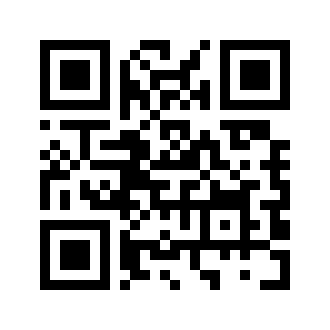

In [79]:
import qrcode

qr = qrcode.QRCode()
qr.add_data('twitter.com/prakharseth19')
qr.make()
qr.make_image(fill_color = 'black', back_color = "white")